# Cinemática Inversa: Ejemplos de soluciones numérica
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/5-Cinematica-Inversa/5-2-Cinematica-Inversa-Numerica.ipynb)

Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC

Fundamentos de Robótica

Este archivo contiene algunos ejemplos de las diapositivas del curso

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.&nbsp;Método de Newton

### 1.1.&nbsp;Ejemplo Robot RR (diap 41-43)

Este ejemplo implementa el método de Newton de manera específica para el robot RR, tal como se desarrolla en las diapositivas del curso (41-43).

In [2]:
# Parámetros del robot
L1 = 1; L2 = 1

# Valor articular inicial
q  = np.array([0.5, 0.5])

# Valor x,y deseado (en el espacio cartesiano)
xd = np.array([1.2, 1.2])

# Hiperparámetros
epsilon = 1e-4         # Máxima tolerancia del error
max_iteraciones = 100  # Máximo número de iteraciones
 
# Bucle principal
for i in range(max_iteraciones):
    q1 = q[0]; q2 = q[1]
    # Jacobiano del robot RR
    J = np.array([[-L1*np.sin(q1)-L2*np.sin(q1+q2), -L2*np.sin(q1+q2)],
                  [ L1*np.cos(q1)+L2*np.cos(q1+q2),  L2*np.cos(q1+q2)]])
    # Cinemática directa del robot RR
    f = np.array([L1*np.cos(q1)+L2*np.cos(q1+q2), L1*np.sin(q1)+L2*np.sin(q1+q2)])
    # Error
    e = xd-f
    # Actualización de q (método de Newton)
    q = q + np.dot(np.linalg.pinv(J), e)

    # Condición de término
    if (np.linalg.norm(e) < epsilon):
        break
 
# Resultado de la cinemática inversa
print("\nValores articulares obtenidos:", np.round(q,4))


Valores articulares obtenidos: [0.2278 1.1152]


### 1.2.&nbsp;Ejemplo Robot RR - Implementación genérica

Este ejemplo implementa el método de Newton de manera específica para el robot RR (el mismo de la sección anterior), pero separando las funciones del cálculo del jacobiano y de la cinemática directa, de tal modo que podría ser extendido a cualquier robot manipulador.

Funciones para el cálculo de la cinemática directa y del jacobiano. En este caso se muestran para el robot RR pero se podrían definir para cualquier manipulador.

In [3]:
def cinematica_directa_RR(q, L1=1, L2=1, all_links=False):
    """Calcula la cinemática directa del robot RR

        q - Valores articulares (q1, q2)
        L1, L2 - longitudes de cada eslabón
        link1 - si True, retorna la posición de todos los eslabones
    """
    q1 = q[0]; q2 = q[1]
    x = L1*np.cos(q1) + L2*np.cos(q1+q2)   # x del eslabón 2 (efector final)
    y = L1*np.sin(q1) + L2*np.sin(q1+q2)   # y del eslabón 2 (efector final)
    if all_links:
        x1 = L1*np.cos(q1)    # x del eslabón 1
        y1 = L1*np.sin(q1)    # y del eslabón 1
        return (x,y), (x1,y1)
    else:
        return np.array([x,y])

def jacobiano_RR(q, L1=1, L2=1):
    q1 = q[0]; q2 = q[1]
    J = np.array([[-L1*np.sin(q1)-L2*np.sin(q1+q2), -L2*np.sin(q1+q2)],
                  [ L1*np.cos(q1)+L2*np.cos(q1+q2),  L2*np.cos(q1+q2)]])
    return J

Función para el cálculo de la cinemática inversa (genérico)

In [4]:
def cinematica_inversa_RR_Newton(Xdeseado, Qinicial, max_iter=100, epsilon=1e-4):
    """Cálculo de la cinemática inversa del robot RR usando el método de Newton
       
        Xdeseado - Posición deseada (x,y) del efector final 
        Qinicial - Configuración articular inicial
        max_iter - número máximo de iteraciones
        epsilon - tolerancia del error
    """
    # Es importante usar "copy" para no sobrescribir el valor original
    q = Qinicial.copy()
    
    # Almacenamiento del error
    ee = []
    
    # Bucle principal
    for i in range(max_iter):
        J = jacobiano_RR(q)
        f = cinematica_directa_RR(q)
        # Error
        e = Xdeseado-f
        # Actualización de q (método de Newton)
        q = q + np.dot(np.linalg.pinv(J), e)

        # Norma del error
        enorm = np.linalg.norm(e)
        print("Error en la iteración {}: {}".format(i, np.round(enorm,4)))
        ee.append(enorm)    # Almacena los errores
        
        # Condición de término
        if (np.linalg.norm(e) < epsilon):
            break
        if (i==max_iter-1):
            print("El algoritmo no llegó al valor deseado")

    return q, ee

**Prueba 1**: cinemática inversa con configuración inicial $q=(0.5, 0.5)$ y valor deseado $x_d=(1.2, 1.2)$:

In [5]:
# Valor articular inicial
qinit  = np.array([0.5, 0.5])

# Valor x,y deseado (en el espacio cartesiano)
xd = np.array([1.2, 1.2])

# Hiperparámetros
epsilon = 1e-4         # Condición para el término
max_iteraciones = 100  # Máximo número de iteraciones
 
# Cinemática Inversa
q, e = cinematica_inversa_RR_Newton(xd, qinit, max_iteraciones, epsilon)
print("\nValores articulares obtenidos:", np.round(q,4))

Error en la iteración 0: 0.2492
Error en la iteración 1: 0.2185
Error en la iteración 2: 0.0204
Error en la iteración 3: 0.0003
Error en la iteración 4: 0.0

Valores articulares obtenidos: [0.2278 1.1152]


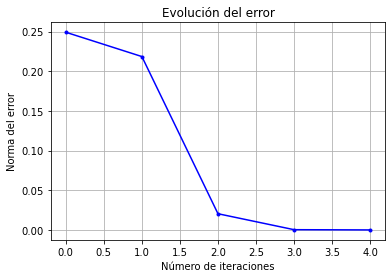

In [6]:
# Gráfico del error (debe ser decreciente)
plt.plot(e,'b')
plt.plot(e,'b.')
plt.title("Evolución del error"); plt.grid()
plt.xlabel("Número de iteraciones"); plt.ylabel("Norma del error")
plt.show()

Verificación utilizando la cinemática directa:

In [7]:
XY = cinematica_directa_RR(q)
print("Coordenada x,y obtenida:", np.round(XY, 4))

Coordenada x,y obtenida: [1.2 1.2]


Visualización de la configuración obtenida:

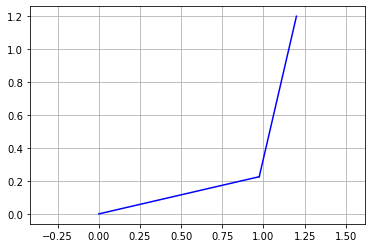

In [8]:
# Posición del eslabón 1 y del eslabón 2
XY2, XY1 = cinematica_directa_RR(q, all_links=True)

# Gráfico de la configuración obtenida
plt.plot([0, XY1[0]],[0, XY1[1]], 'b')
plt.plot([XY1[0], XY2[0]],[XY1[1], XY2[1]], 'b')
plt.axis('equal'); plt.grid()
plt.show()

**Prueba 2**: cinemática inversa con configuración inicial $q=(1, -1)$ y valor deseado $x_d=(1.2, 1.2)$:

In [9]:
# Valor articular inicial
qinit  = np.array([1, -1])

# Cinemática Inversa
q, e = cinematica_inversa_RR_Newton(xd, qinit)
print("\nValores articulares obtenidos:", np.round(q,4))

Error en la iteración 0: 0.4943
Error en la iteración 1: 0.0864
Error en la iteración 2: 0.0044
Error en la iteración 3: 0.0

Valores articulares obtenidos: [ 1.343  -1.1152]


Verificación usando la cinemática directa:

In [10]:
XY = cinematica_directa_RR(q)
print("Coordenada x,y obtenida:", np.round(XY, 4))

Coordenada x,y obtenida: [1.2 1.2]


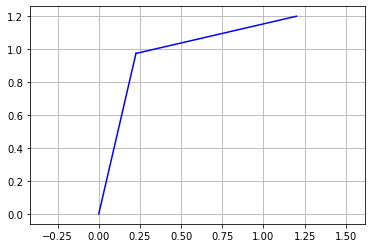

In [11]:
# Posición del eslabón 1 y del eslabón 2
XY2, XY1 = cinematica_directa_RR(q, all_links=True)

# Gráfico de la configuración obtenida
plt.plot([0, XY1[0]],[0, XY1[1]], 'b')
plt.plot([XY1[0], XY2[0]],[XY1[1], XY2[1]], 'b')
plt.axis('equal'); plt.grid()
plt.show()

## 2.&nbsp;Método del Descenso del Gradiente

### 2.1.&nbsp;Ejemplo Robot RR (diap 47-49)

Este ejemplo implementa el método del descenso del gradiente (o máximo decrecimiento) de manera específica para el robot RR, tal como se desarrolla en las diapositivas del curso (47-49).

In [12]:
# Parámetros del robot
L1 = 1; L2 = 1

# Valor articular inicial
q  = np.array([0.5, 0.5])

# Valor x,y deseado (en el espacio cartesiano)
Xd = np.array([1.2, 1.2])

# Hiperparámetros
epsilon = 1e-4          # Máximo error admisible (condición para el término)
max_iteraciones = 1000  # Máximo número de iteraciones
alfa = 0.5

# Bucle principal
for i in range(max_iteraciones):
    q1 = q[0]; q2 = q[1]
    
    # Jacobiano
    J = np.array([[-L1*np.sin(q1)-L2*np.sin(q1+q2), -L2*np.sin(q1+q2)],
                  [ L1*np.cos(q1)+L2*np.cos(q1+q2),  L2*np.cos(q1+q2)]])
    # Posición del efector final (cinemática directa)
    f = np.array([L1*np.cos(q1)+L2*np.cos(q1+q2), 
                  L1*np.sin(q1)+L2*np.sin(q1+q2)])
    # Error
    e = Xd-f
    # Actualización del valor articular (descenso del gradiente)
    q = q + alfa*np.dot(J.T, e)

    # Condición de término
    if (np.linalg.norm(e) < epsilon):
        print("Cinemática inversa: solución obtenida")
        break

print("Valores articulares obtenidos:", np.round(q,4))

Cinemática inversa: solución obtenida
Valores articulares obtenidos: [0.2279 1.115 ]


### 2.2.&nbsp;Ejemplo Robot RR - Implementación genérica

Este ejemplo implementa el método del descenso del gradiente (máximo decrecimiento / "gradient descent") de manera específica para el robot RR (el mismo de la sección anterior), pero separando las funciones del cálculo del jacobiano y de la cinemática directa, de tal modo que podría ser extendido a cualquier robot manipulador.

Se hace uso de las funciones de cinemática directa y jacobiano (del robot RR) definidas al inicio de la sección 1.2.

In [13]:
def cinematica_inversa_RR_Gradiente(Xdeseado, Qinicial, alfa=0.5, max_iter=100, epsilon=1e-4):
    """Cálculo de la cinemática inversa usando el método del descenso del gradiente
       
        Xdeseado - Posición deseada (x,y) del efector final 
        Qinicial - Configuración articular inicial
        alfa - tamaño de paso ("learning rate")
        max_iter - número máximo de iteraciones
        epsilon - tolerancia del error
    """
    # Es importante usar "copy" para no sobrescribir el valor original
    q = Qinicial.copy()
    # Almacenamiento del error
    ee = []
    
    # Bucle principal
    for i in range(max_iter):
        J = jacobiano_RR(q)
        f = cinematica_directa_RR(q)
        # Error
        e = Xdeseado-f
        # Actualización de q
        q = q + alfa*np.dot(J.T, e)

        # Norma del error
        enorm = np.linalg.norm(e)
        # print("Error en la iteración {}: {}".format(i, np.round(enorm,4)))
        ee.append(enorm)    # Almacena los errores
        
        # Condición de término
        if (np.linalg.norm(e) < epsilon):
            print("Cinemática inversa: solución obtenida")
            break
        if (i==max_iter-1):
            print("No se llegó a la solución deseada: modificar el valor de alfa")
    return q, ee

Prueba de la cinemática inversa:

In [14]:
# Valor articular inicial
qinit  = np.array([0.5, 0.5])

# Valor x,y deseado (en el espacio cartesiano)
xd = np.array([1.2, 1.2])

# Hiperparámetros
epsilon = 1e-4          # Condición para el término
max_iteraciones = 1000  # Máximo número de iteraciones
alfa = 0.5
    
# Cinemática Inversa
q, e = cinematica_inversa_RR_Gradiente(xd, qinit, alfa, max_iteraciones, epsilon)
print("Valores articulares obtenidos:", np.round(q,4))

Cinemática inversa: solución obtenida
Valores articulares obtenidos: [0.2279 1.115 ]


Verificación usando la cinemática directa:

In [15]:
XY = cinematica_directa_RR(q)
print("Coordenada x,y obtenida:", np.round(XY, 4))

Coordenada x,y obtenida: [1.2    1.2001]


**Gráfico de la evolución del error**: Se podrá observar que se requiere más iteraciones que el método de Newton. Se puede variar el valor de `alfa` para observar el efecto que tiene sobre la rapidez de convergencia y sobre la convergencia misma.

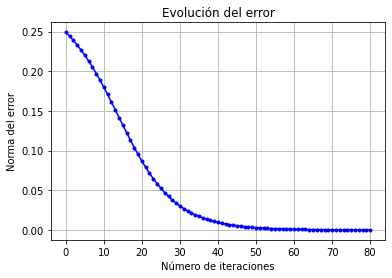

In [16]:
# Gráfico del error
plt.plot(e,'b')
plt.plot(e,'b.')
plt.title("Evolución del error"); plt.grid()
plt.xlabel("Número de iteraciones"); plt.ylabel("Norma del error");

## 3.&nbsp;Cálculo Numérico del Jacobiano

### 3.1.&nbsp;Ejemplo Robot RR (diap 53-56)

Se utilizará la función `cinematica_directa_RR`, definida anteriormente, para el robot RR.

In [17]:
# Configuración articular
q = (0.5, 1.0)
q1 = q[0]; q2 = q[1]

# Valor pequeño para la diferenciación por diferencias finitas
delta = 0.001

# Columna con incremento de q1
col1 = 1/delta * (cinematica_directa_RR([q1+delta, q2]) - cinematica_directa_RR([q1,q2]))
# Columna con incremento de q2
col2 = 1/delta * (cinematica_directa_RR([q1, q2+delta]) - cinematica_directa_RR([q1,q2]))

print(col1)
print(col2)

[-1.47739444  0.94758115]
[-0.99753019  0.07023844]


In [18]:
# Arreglar el tamaño de las columnas (2x1)
col1 = col1.reshape(2,1)
col2 = col2.reshape(2,1)

print(col1)
print(col2)

[[-1.47739444]
 [ 0.94758115]]
[[-0.99753019]
 [ 0.07023844]]


In [19]:
# Jacobiano: usando ambas columnas
J = np.hstack((col1, col2))

print(np.round(J,4))

[[-1.4774 -0.9975]
 [ 0.9476  0.0702]]


### 3.2.&nbsp;Ejemplo de cálculo genérico

Se utilizará como ejemplo el jacobiano del robot RR. Se utilizará la función de cinemática directa de este robot, definida anteriormente.

In [20]:
def jacobian(q, delta=0.001):
    """
    Jacobiano para el robot RR
    """
    # Alocar espacio: matriz de ceros del tamaño adecuado (2x2 para XY del robot RR)
    J = np.zeros((2,2))
    # Posición en la configuración q
    x = cinematica_directa_RR(q)
    
    # Iteraciones para las derivadas columna por columna
    for i in range(2):
        # Copiar la configuracion articular inicial (importante)
        dq = np.copy(q)
        
        # Incrementar la articulacion i-esima usando un delta: qi+delta
        dq[i] = dq[i] + delta
        # Posición luego del incremento (con qi+delta)
        dx = cinematica_directa_RR(dq)
        
        # Columna i usando diferencias finitas
        columna_i = 1/delta * (dx-x)
        # Almacenamiento de la columna i
        J[:,i] = columna_i

    return J

Ejemplo de uso:

In [21]:
q = (0.5, 1.0)
J = jacobian(q)

print(np.round(J,4))

[[-1.4774 -0.9975]
 [ 0.9476  0.0702]]


**Nota**: la cinemática directa utilizada en la función `jacobian` retorna directamente las posiciones `x`, `y`. En casos más genéricos, la cinemática directa retorna una transformación homogénea, de la cual se debe extraer los componentes de posición (cuarta columna).